#### Exploration de mon fichier 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Import de la donnée 
data_dir = r"C:\Users\j_aka\Desktop\mlops\credit_risk_dataset.csv"
df = pd.read_csv(data_dir, delimiter=",") 

In [13]:
print(df.head(3).to_string())

   person_age  person_income person_home_ownership  person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length
0          22          59000                  RENT              123.0    PERSONAL          D      35000          16.02            1                 0.59                         Y                           3
1          21           9600                   OWN                5.0   EDUCATION          B       1000          11.14            0                 0.10                         N                           2
2          25           9600              MORTGAGE                1.0     MEDICAL          C       5500          12.87            1                 0.57                         N                           3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [17]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [18]:
df.notnull().sum()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

## colinéarité etude 

In [19]:
# Encodage des variables catégorielles si nécessaire
df_encoded = pd.get_dummies(df, drop_first=True)


In [20]:
# Calcul de la matrice de corrélation
corr_matrix = df_encoded.corr()


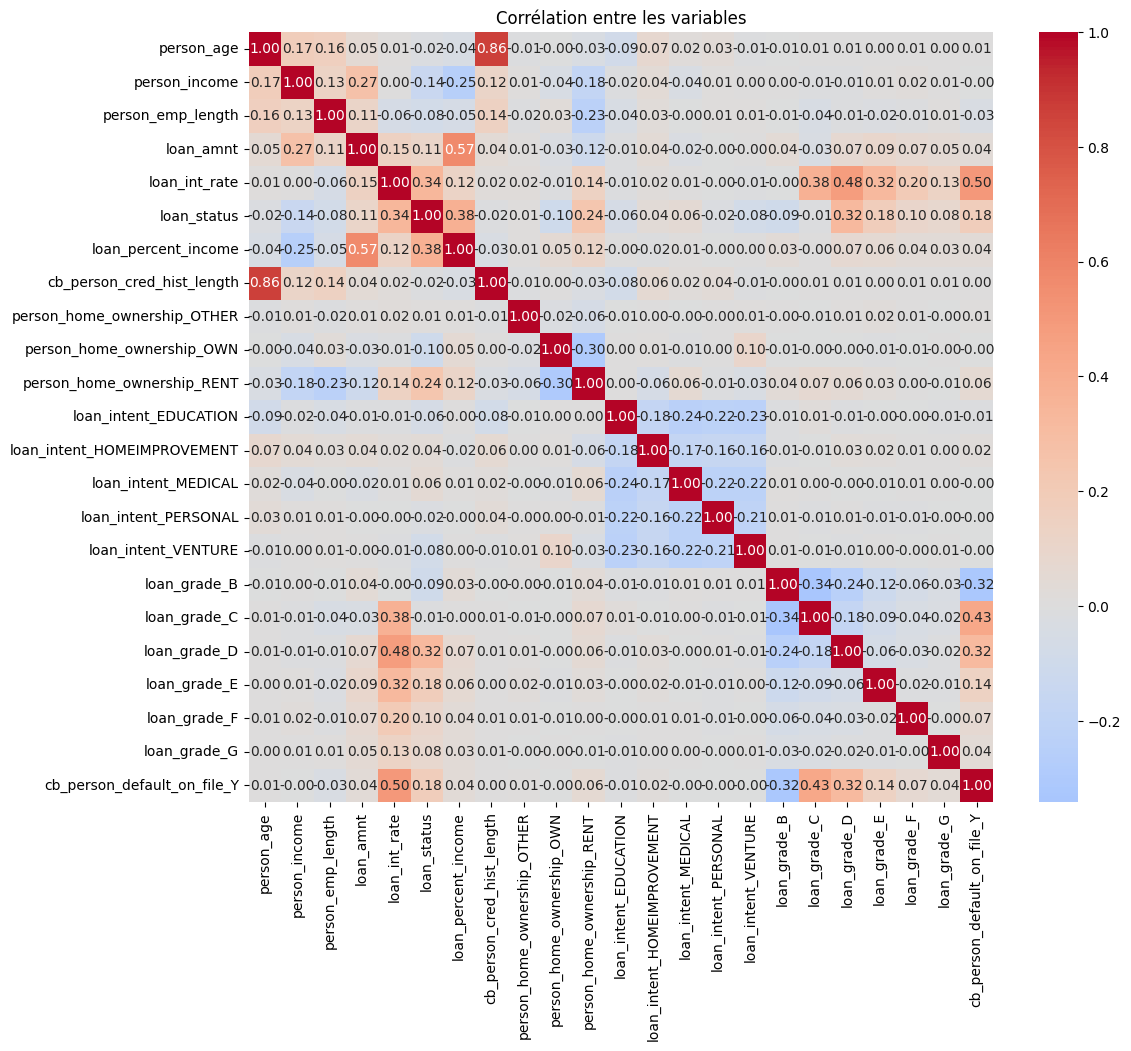

In [21]:
# Affichage du heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Corrélation entre les variables")
plt.show()


In [22]:
target_corr = corr_matrix["loan_status"].sort_values(ascending=False)
print(target_corr)

loan_status                    1.000000
loan_percent_income            0.379366
loan_int_rate                  0.335133
loan_grade_D                   0.318998
person_home_ownership_RENT     0.238430
loan_grade_E                   0.180122
cb_person_default_on_file_Y    0.179141
loan_amnt                      0.105376
loan_grade_F                   0.101841
loan_grade_G                   0.082306
loan_intent_MEDICAL            0.056595
loan_intent_HOMEIMPROVEMENT    0.036607
person_home_ownership_OTHER    0.012543
loan_grade_C                  -0.013031
cb_person_cred_hist_length    -0.015529
loan_intent_PERSONAL          -0.021094
person_age                    -0.021629
loan_intent_EDUCATION         -0.055348
loan_intent_VENTURE           -0.078274
person_emp_length             -0.082489
loan_grade_B                  -0.092190
person_home_ownership_OWN     -0.101960
person_income                 -0.144449
Name: loan_status, dtype: float64


In [23]:
df["loan_int_rate_missing"] = df["loan_int_rate"].isnull().astype(int)
print(df[["loan_int_rate_missing", "loan_status"]].corr())

                       loan_int_rate_missing  loan_status
loan_int_rate_missing               1.000000    -0.009046
loan_status                        -0.009046     1.000000
